In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [21]:
data = pd.read_csv("Pokemon.csv")

In [22]:
data.head()

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [63]:
# mapping
mapping = { label:idx for idx, label in enumerate(np.unique(data["Type 1"]))}
mapping2 = {label:idx for idx, label in enumerate(np.unique(data["Legendary"]))}
data["Type 1"] = data["Type 1"].map(mapping)
data["Type 2"] = data["Type 2"].map(mapping)
data["Legendary"] = data["Legendary"].map(mapping2)

In [77]:
for i in range(data.shape[0]):
    if pd.isnull(data["Type 2"][i]) == True:
        data["Type 2"][i] = -1

/Users/susu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


[]

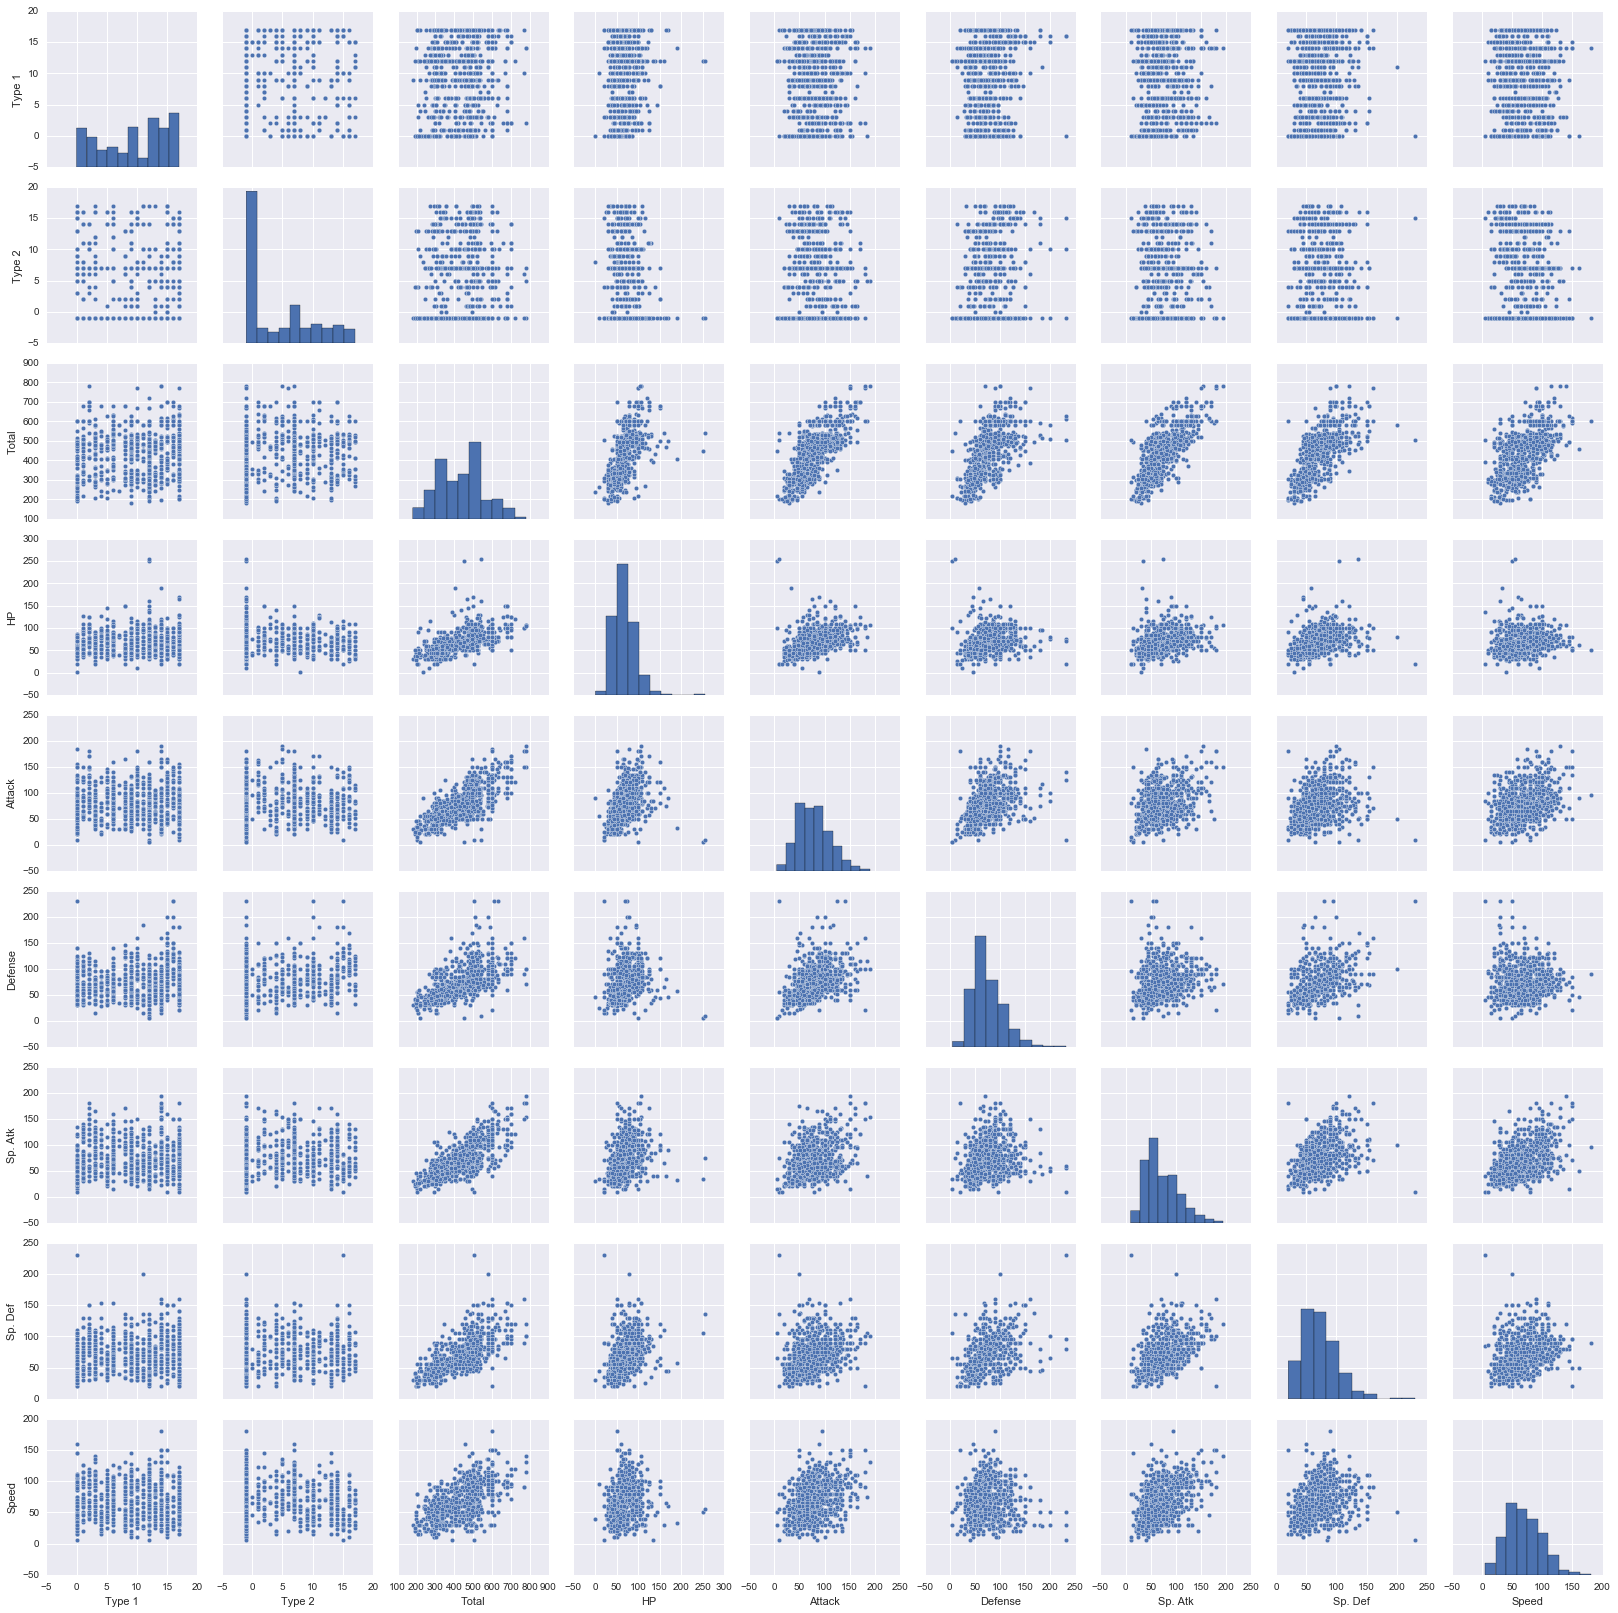

In [80]:
sns.pairplot(data[data.columns[2:11]])
plt.plot()

# legend ?

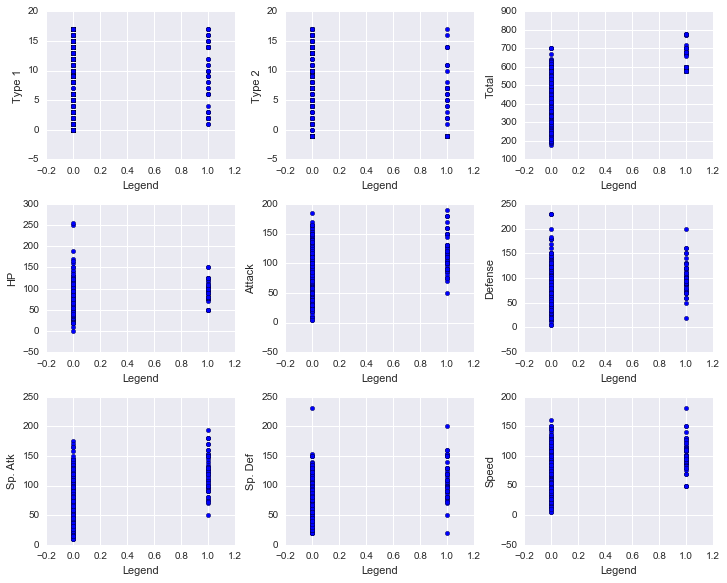

In [123]:
fig, ax = plt.subplots(ncols = 3, nrows = 3, figsize=(10, 8))
ax = ax.flatten()
for n,i in enumerate(data.columns[2:11]):
    ax[n].scatter(data["Legendary"], data[i])
    ax[n].set_ylabel(i)
    ax[n].set_xlabel("Legend")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

we can know legend pokemon has unbalanced properties since their "total" are high and their each properties are not so different from other normal pokemons.

let's view this in the below

In [158]:
# normalizing the data
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

data2 = pd.DataFrame(stdsc.fit_transform(data[data.columns[5:11]]))
data2.columns = data.columns[5:11]
data_norm = pd.concat([data2, data["Legendary"]], axis = 1)
data_norm = pd.concat([data_norm, data_norm[data_norm.columns[0:6]].var(axis = 1)], axis = 1)
data_norm.rename(columns = {"0":"var"}, inplace = True)

print("non legend pokemon's variance", data_norm[data_norm["Legendary"] == 0][0].mean())
print("legend pokemon's variance", data_norm[data_norm["Legendary"] == 1][0].mean())

non legend pokemon's variance 0.6412740290650156
legend pokemon's variance 0.9151274960127672


In [163]:
# F test
nonlegend = data_norm[data_norm["Legendary"] == 0][0].mean()
legend = data_norm[data_norm["Legendary"] == 1][0].mean()
df1 = data_norm.shape[0] - data_norm["Legendary"].sum()
df2 = data_norm["Legendary"].sum()

test_statistic = (legend/(df2-1)) / (nonlegend/(df1-1))
test_statistic

16.366433060136217

Then the difference is statistically significant.

We use this fact to predict whether the pokemon is legend one or not.